# Demo of Build and Parameterize tools from SwiftPol

- Build a short linear co-polymer chain
- Use [Espaloma Charge](https://github.com/choderalab/espaloma) and [NAGL](https://github.com/openforcefield/openff-nagl) to assign charges to the SwiftPol chain, and compare values
- Use a Ring Opening Polymerisation scheme to build a PLGA chain
- Create a small SwiftPol PLGA ensemble, assign partial charges to the chain, and inspect the first chain in the system
- Solvate the PLGA ensemble with water, NaCl and 0.5% residual monomer
- Test the effect of a uniform and normal distribution on the chain length and % lactide of a SwiftPol PLGA ensemble
- Build a commercially available PLGA chain

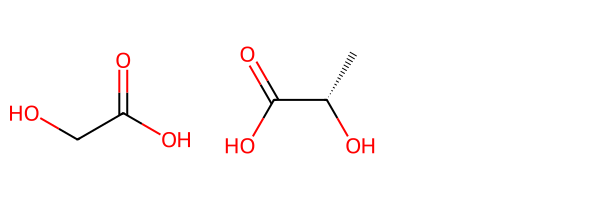

In [1]:
# Suppress OpenEye Toolkits license warning
warnings.filterwarnings("ignore")
#Import monomers to build PLGA and visualise using RDkit
from rdkit import Chem
monomer_smiles = ['OC(=O)CO', 'C[C@@H](C(=O)[OH])O']
glycolic = Chem.MolFromSmiles(monomer_smiles[0])
lactate = Chem.MolFromSmiles(monomer_smiles[1])
Chem.Draw.MolsToGridImage([glycolic,lactate])

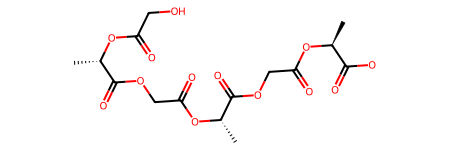

In [9]:
#Build a short linear chain using Swiftpol
from swiftpol import build
chain = build.build_linear_copolymer(sequence = 'ABABAB', monomer_a_smiles = 'C[C@@H](C(=O)[OH])O', monomer_b_smiles = 'OC(=O)CO')[0]
chain

In [3]:
#Assign charges to the chain using Espaloma Charge
from swiftpol import parameterize
import warnings
warnings.filterwarnings('ignore')
parameterize.print_polymer_charges(polymer = chain, charge_scheme='espaloma')

array([ 9.66779441e-02, -4.89754051e-01,  7.82715082e-01,  7.54409969e-01,
       -1.34297684e-01, -4.66306925e-01, -5.54363906e-01, -7.33221881e-04,
        7.77123094e-01, -4.96664464e-01, -5.82999945e-01,  9.48170722e-02,
        7.54409969e-01, -1.34297699e-01, -4.66306925e-01, -5.54363906e-01,
       -7.33221881e-04,  7.77123094e-01, -4.94031399e-01, -5.82999945e-01,
        9.09776166e-02,  8.01335156e-01, -1.31069824e-01, -5.08667111e-01,
       -5.43020427e-01, -1.82934338e-03, -6.75435722e-01, -6.55341148e-01,
        1.13536134e-01,  7.87098333e-02,  7.87098333e-02,  7.87098333e-02,
        1.24006636e-01,  1.24006636e-01,  1.13536134e-01,  7.87098333e-02,
        7.87098333e-02,  7.87098333e-02,  1.24006636e-01,  1.24006636e-01,
        1.16298974e-01,  7.87098333e-02,  7.87098333e-02,  7.87098333e-02,
        9.41647366e-02,  9.41647366e-02,  4.05642599e-01,  4.01869804e-01],
      dtype=float32)

In [10]:
#Assign charges to the chain using NAGL
from swiftpol import parameterize
import warnings
warnings.filterwarnings('ignore')
parameterize.print_polymer_charges(polymer = chain, charge_scheme='NAGL')

Magnitude,[0.10263152793049812 -0.43222128972411156 0.6375392712652683 0.6414504684507847 -0.1102319024503231 -0.4282985292375088 -0.5059101544320583 0.08891593292355537 0.648731354624033 -0.4301983080804348 -0.5070771537721157 0.10114308074116707 0.64226109161973 -0.10939299687743187 -0.4282985292375088 -0.5059101544320583 0.08914204314351082 0.647626344114542 -0.43224435672163963 -0.5049337707459927 0.10760575160384178 0.6334159411489964 -0.11229469254612923 -0.520682331174612 -0.49706223234534264 0.09857141599059105 -0.5711436234414577 -0.60180389508605 0.10524486377835274 0.06287561729550362 0.06287561729550362 0.06287561729550362 0.09341059997677803 0.09341059997677803 0.10609206184744835 0.06287561729550362 0.06287561729550362 0.06287561729550362 0.09341059997677803 0.09341059997677803 0.10720657929778099 0.06354057416319847 0.06354057416319847 0.06354057416319847 0.06679460778832436 0.06679460778832436 0.4146423377096653 0.45037681236863136]
Units,elementary_charge


Text(0, 0.5, 'Espaloma')

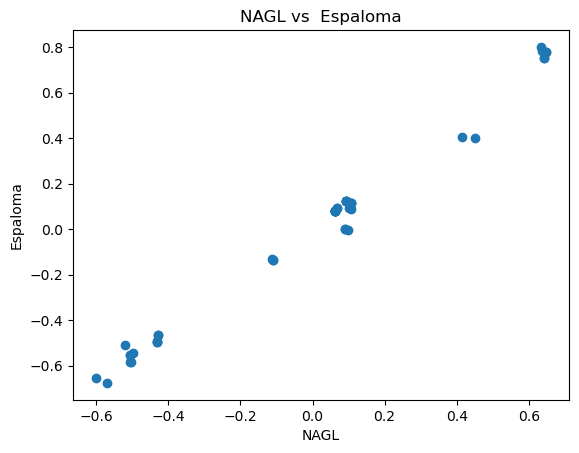

In [12]:
#Compare charges
import matplotlib.pyplot as plt
plt.scatter(parameterize.print_polymer_charges(polymer = chain, charge_scheme='NAGL'), 
            parameterize.print_polymer_charges(polymer = chain, charge_scheme='espaloma'))
plt.title('NAGL vs  Espaloma')
plt.xlabel('NAGL')
plt.ylabel('Espaloma')

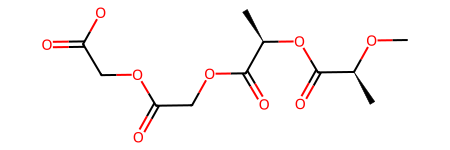

In [5]:
#Build a PLGA chain using Ring Opening Polymerisation
polymer = build.build_PLGA_ring(sequence = 'LLGG', terminal='ester')[0]
polymer

In [6]:
#Calculate the polydispersity index of the PLGA chain
PDI = build.PDI([polymer])[0]
print('PDI = ', PDI)

PDI =  1.0


In [7]:
#Calculate the blockiness of the sequence
mean_blockiness, G_block_length, L_block_length = build.blockiness_calc(sequence='LLGG')
print("Average chain blockiness =", round(mean_blockiness,1))
print("G Block length =", round(G_block_length))
print("L Block length =", round(L_block_length))

Average chain blockiness = 1.0
G Block length = 2
L Block length = 2


## Ensemble Build

In [14]:
#Create a system
from swiftpol.build import PLGA_system
x = build.PLGA_system(80, 10, 1.0, 'ester', 5)
print('Actual lactide conc. = ', round(x.lactide_actual,2))
print('length range = ', x.min_length, '-', x.max_length)
print("Polydispersity Index = ", round(x.PDI,3))
print("Average chain blockiness =", x.mean_blockiness)

System built!, size = 5
Actual lactide conc. =  78.0
length range =  8 - 10
Polydispersity Index =  2.731
Average chain blockiness = 1.0


In [16]:
#Charge the PLGA system using espaloma 
x.charge_system()

LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!


In [17]:
#Inspect the first chain in our system
x.chains[0].visualize(backend='nglview')

NGLWidget()

In [18]:
#Create a solvated system, ready to export into GROMACS or OpenMM
#Including 0.05% w/w residual monomer
from openff.units import unit
solv_system = x.build_system(resid_monomer = 0.5, salt_concentration = 0.1 * unit.mole / unit.liter)
print('residual_monomer =', x.residual_monomer, '%')

UnboundLocalError: cannot access local variable 'result' where it is not associated with a value

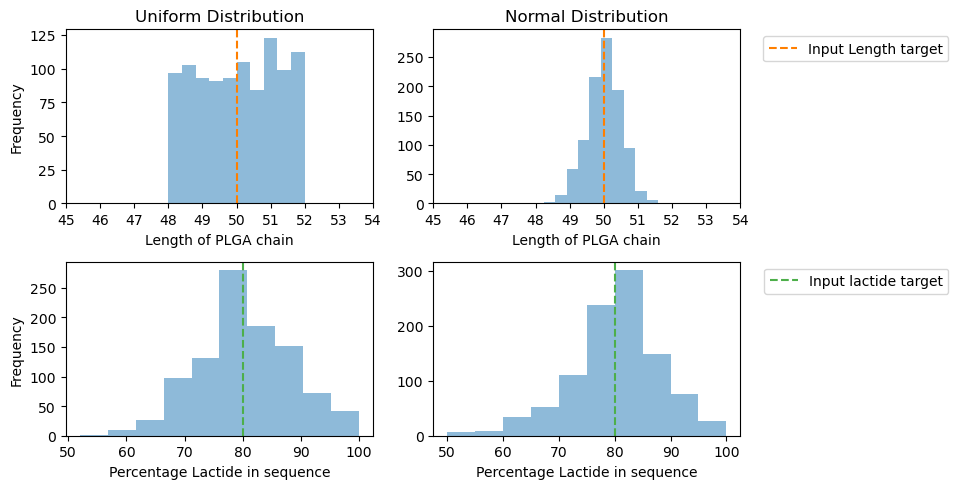

In [21]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
# Effect of a normal distribution
perc_lactide_target, length_target, num_chains = 80, 50, 1000 # specify input parameters

#Generate lengths and sequences without a normal distribution applied
lengths_1 = []
lac_1 = []
chains_1 = []
for i in range(num_chains):
    length_actual = np.random.uniform(int(round(length_target*0.95)),int(round(length_target*1.05)))
    lengths_1.append(length_actual)
    sequence = reduce(lambda x, y: x + y, np.random.choice(['LL', 'GG'], size=(int(length_actual/2),), p=[perc_lactide_target/100,1-(perc_lactide_target/100)]))
    actual_lac = sequence.count('L')
    lac_1.append((actual_lac/len(sequence)*100))
    chains_1.append(build.build_PLGA_ring(sequence=sequence, terminal ='hydroxyl')[0])


#Generate lengths and sequences with a normal distribution applied
lengths_2 = []
lac_2 = []
mw_list2 = []
chains_2 = []
for i in range(num_chains):
    length_actual = np.random.normal(length_target, 0.5)
    lengths_2.append(length_actual)
    sequence = reduce(lambda x, y: x + y, np.random.choice(['LL', 'GG'], size=(int(length_actual/2),), p=[perc_lactide_target/100,1-(perc_lactide_target/100)]))
    actual_lac = sequence.count('L')
    lac_2.append((actual_lac/len(sequence)*100))
    chains_2.append(build.build_PLGA_ring(sequence=sequence, terminal ='hydroxyl')[0])

#Plot
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0,0].hist(lengths_1, rwidth=1, alpha=0.5)
axs[0,0].set_xticks(range(int(round(length_target*0.9)),int(round(length_target*1.1))))
axs[0,0].set_xlabel('Length of PLGA chain')
axs[0,0].set_ylabel('Frequency')
axs[0,0].axvline(length_target, color='#ff7f00', linestyle='--', label='Input Length target')
axs[0,0].set_title('Uniform Distribution')

axs[0,1].hist(lengths_2, rwidth=1, alpha=0.5)
axs[0,1].set_xticks(range(int(round(length_target*0.9)),int(round(length_target*1.1))))
axs[0,1].set_xlabel('Length of PLGA chain')
axs[0,1].axvline(length_target, color='#ff7f00', linestyle='--', label='Input Length target')
axs[0,1].set_title('Normal Distribution')
axs[0,1].legend(bbox_to_anchor=(1.7, 1.0))

axs[1,0].hist(lac_1, alpha=0.5)
axs[1,0].set_xlabel('Percentage Lactide in sequence')
axs[1,0].set_ylabel('Frequency')
axs[1,0].axvline(perc_lactide_target, color='#4daf4a', linestyle='--', label='Input lactide target')

axs[1,1].hist(lac_2, alpha=0.5)
axs[1,1].set_xlabel('Percentage Lactide in sequence')
axs[1,1].axvline(perc_lactide_target, color='#4daf4a', linestyle='--', label='Input lactide target')

plt.legend(bbox_to_anchor=(1.7, 1.0))
plt.tight_layout()
plt.show()

## Resomer® LG 756 S

Building a [commerically available PLGA](https://www.sigmaaldrich.com/GB/en/product/aldrich/719927) molecule with input specification based on quality assurance parameters

Blockiness value from literature:
Sun J, et al. 2022 | Characterization of commercial PLGAs by NMR spectroscopy. Drug Deliv Transl Res. 


In [22]:
#Create a system
import time
start = time.process_time()
x = build.PLGA_system(75, 1200, 1.7, 'ester', 1)
end = time.process_time()
print('Actual lactide conc. = ', round(x.lactide_actual,2))
print('length = ', x.min_length)
print("Polydispersity Index = ", round(x.PDI,3))
print("Average chain blockiness =", round(x.mean_blockiness,1))
print("Average Molecular Weight =", x.mol_weight_average)
print("G Block length =", round(x.G_block_length))
print("L Block length =", round(x.L_block_length))
#Print time taken to build chain
time_elapsed = end - start
print('Build time -', time_elapsed)

System built!, size = 1
Actual lactide conc. =  71.33
length =  1200
Polydispersity Index =  1.0
Average chain blockiness = 1.6
Average Molecular Weight = 81636.0
G Block length = 3
L Block length = 8
Build time - 69.897411
